# <font color = blue> Credit EDA Case Study </font>

In [2]:
#Import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data understanding

### Data Reading & Data Types

**'application_data.csv'** contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

In [6]:
app_data = pd.read_csv("application_data.csv", header=0)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


**'previous_application.csv'** contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [7]:
pre_app = pd.read_csv("previous_application.csv", header=0)
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
pre_app.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

**'columns_description.csv'** is data dictionary which describes the meaning of the variables.'

In [9]:
col_desc = pd.read_csv("columns_description.csv", header=0, encoding= 'unicode_escape')
col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


UnicodeDecodeError: 'utf-8' codec can't decode<br>
The error is because there is some non-ascii character in the dictionary and it can't be encoded/decoded. One simple way to avoid this error is to encode such strings with encoding()<br>
[Reference from Stackoverflow](https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s)

In [10]:
# getting ride of all Unnamed columns from your DataFrame by using regex
col_desc.drop(col_desc.filter(regex="Unname"),axis=1, inplace=True)

In [12]:
col_desc

,Table,Row,Description,Special
0,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_data,CODE_GENDER,Gender of the client,NaN
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,application_data,AMT_ANNUITY,Loan annuity,NaN


In [12]:
col_desc.dtypes

Table          object
Row            object
Description    object
Special        object
dtype: object

In [13]:
col_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        160 non-null    object
 1   Row          160 non-null    object
 2   Description  160 non-null    object
 3   Special      69 non-null     object
dtypes: object(4)
memory usage: 5.1+ KB


### NAME_CONTRACT_TYPE
#### Cash Loans
A cash loan is a loan which is received by the borrower in cash. This sets it apart from overdraft loans, installment loans and leases. Cash loans may be given to a private individual as a personal loan or to a business as a business loan.<br>
The **main difference between a cash/payday loan and a personal loan** is the basic terms. A payday loan is an extremely short-term loan usually due within a month, while the term for a personal loan is at least two years. ... If you take out a personal loan and make payments on time, your credit score will climb.
#### Consumer Loans
Consumer loans are usually personal loans. So are fast loans or credit. The defining feature of fast loans, which are not regulated by law, is the speed with which they are granted. Lenders simplify risk analysis procedures and this usually translates into higher costs for the customer.
#### Revolving Loans
Credit cards and HELOCs are the most commonly used forms of revolving loans

## Data Cleaning and Manipulation

In [8]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [10]:
app_data.shape

(307511, 122)

In [28]:
app_data.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_18                   0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_21                   0
FLAG_DOCUMENT_20                   0
FLAG_DOCUMENT_19                   0
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_17                   0
F

### Handling missing values
#### Dropping columns having null values greater than 100000

In [8]:
app_data = app_data.loc[:, app_data.isnull().sum()<=100000]
app_data.shape

(307511, 73)

In [13]:
pre_app.shape

(1670214, 37)

In [52]:
app_data.shape

(307511, 73)

### Handling missing values for OCCUPATION_TYPE column

In [6]:
app_data.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [11]:
float(100.0*96391/307511)

31.345545362604916

In [13]:
occ_type_mode = app_data.OCCUPATION_TYPE.mode()[0]
occ_type_mode

'Laborers'

In [15]:
app_data.OCCUPATION_TYPE.isnull().sum()

96391

In [10]:
## Imputing the missing values with category 'Others' as it's having highest number of count
app_data.OCCUPATION_TYPE.fillna('Others', inplace=True)
app_data.OCCUPATION_TYPE.value_counts(normalize=True)

Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

### Handling missing values for AMT_ANNUTY

In [9]:
app_data.AMT_ANNUITY.isnull().sum()

12

In [37]:
app_data.shape

(307511, 73)

In [27]:
float(100.0*12/307511)

0.0039022994299390914

In [11]:
## As the number of missing values are very small, we will remove these 12 records 
app_data1 = app_data[~app_data.AMT_ANNUITY.isnull()].copy()
app_data1.shape

(307499, 73)

### Handling missing values for CNT_FAM_MEMBERS

In [38]:
app_data1.CNT_FAM_MEMBERS.isnull().sum()

2

In [25]:
app_data1.shape

(307499, 73)

In [12]:
## As the number of rows with missing values was very less as compared to total dataset, we will remove those 2 records.
app_data2 = app_data1[~app_data1.CNT_FAM_MEMBERS.isnull()].copy()
app_data2.shape

(307497, 73)

### Standardising values

Coverting days to years to calc an approx DOB of customers

In [12]:
app_data2.DAYS_BIRTH.value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24988     1
-7829      1
-25179     1
-25070     1
-7720      1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [13]:
app_data2.DAYS_BIRTH = abs(app_data2.DAYS_BIRTH)
app_data2.DAYS_BIRTH.head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [11]:
app_data2.DAYS_BIRTH.value_counts()

13749    43
13481    42
10020    41
18248    41
10292    40
         ..
24880     1
7934      1
16436     1
25177     1
24517     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [14]:
app_data2.DAYS_BIRTH = app_data2.DAYS_BIRTH.div(365).round(0)
app_data2.DAYS_BIRTH

0         26.0
1         46.0
2         52.0
3         52.0
4         55.0
          ... 
307506    26.0
307507    57.0
307508    41.0
307509    33.0
307510    46.0
Name: DAYS_BIRTH, Length: 307497, dtype: float64

In [18]:
app_data2.DAYS_BIRTH.describe()

count    307497.000000
mean         43.938871
std          11.964095
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

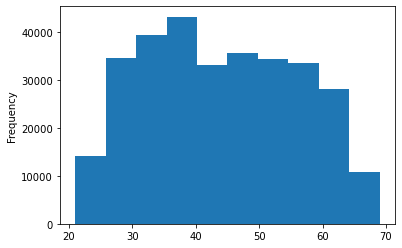

In [17]:
app_data2.DAYS_BIRTH.plot.hist()
plt.show()

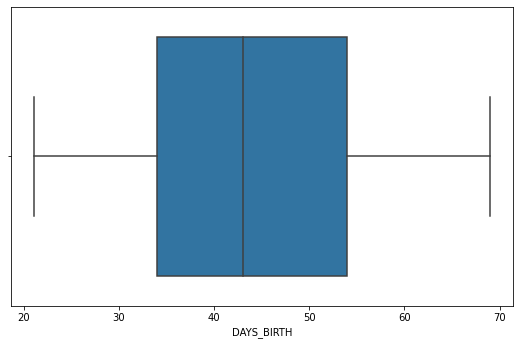

In [57]:
sns.boxplot(app_data2.DAYS_BIRTH)
plt.show()

Converting DAYS_EMPLOYED column values to year

In [13]:
app_data2.DAYS_EMPLOYED.value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-11060         1
-10409         1
-10155         1
-11948         1
-12341         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

Replace values for rows containing days as 365243 with NaN as it seems to be junk value or incorrect for 18% of the data in DAYS_EMPLOYED column

In [15]:
app_data2.DAYS_EMPLOYED = app_data2.DAYS_EMPLOYED.replace(365243, np.nan)
app_data2.DAYS_EMPLOYED

0         -637.0
1        -1188.0
2         -225.0
3        -3039.0
4        -3038.0
           ...  
307506    -236.0
307507       NaN
307508   -7921.0
307509   -4786.0
307510   -1262.0
Name: DAYS_EMPLOYED, Length: 307497, dtype: float64

In [15]:
app_data2.DAYS_EMPLOYED.value_counts()

-200.0      156
-224.0      152
-199.0      151
-230.0      151
-212.0      150
           ... 
-13032.0      1
-14968.0      1
-11101.0      1
-9816.0       1
-12537.0      1
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

In [16]:
app_data2.DAYS_EMPLOYED = abs(app_data2.DAYS_EMPLOYED)
app_data2.DAYS_EMPLOYED.value_counts()

200.0      156
224.0      152
230.0      151
199.0      151
212.0      150
          ... 
10409.0      1
7399.0       1
13161.0      1
12791.0      1
11464.0      1
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

In [17]:
app_data2.DAYS_EMPLOYED = app_data2.DAYS_EMPLOYED.div(365).round(0)
app_data2.DAYS_EMPLOYED

0          2.0
1          3.0
2          1.0
3          8.0
4          8.0
          ... 
307506     1.0
307507     NaN
307508    22.0
307509    13.0
307510     3.0
Name: DAYS_EMPLOYED, Length: 307497, dtype: float64

In [26]:
app_data2.DAYS_EMPLOYED.describe()

count    252123.000000
mean          6.532748
std           6.411711
min           0.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          49.000000
Name: DAYS_EMPLOYED, dtype: float64

In [55]:
app_data2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,2.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,1.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,8.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55.0,8.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
app_data2.shape

(307497, 73)

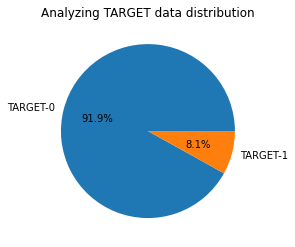

In [18]:
plt.pie(app_data2['TARGET'].value_counts(normalize=True)*100,autopct='%1.1f%%',labels=['TARGET-0','TARGET-1'])
plt.title('Analyzing TARGET data distribution')
plt.show()

-- From the above pie chart we can clearly see there is a data imbalance where almost 92% people are regular with the loan payments and only around 8% of them are facing difficulties with payments.

In [19]:
new_updated_app_data = app_data2[['SK_ID_CURR','TARGET','CODE_GENDER','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                             'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                             'NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE','EXT_SOURCE_2','EXT_SOURCE_3',
                             'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                             'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']]
new_updated_app_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,M,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,26.0,2.0,Laborers,0.262949,0.139376,2.0,2.0,2.0,2.0,N,Y,0,351000.0,1.0,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,F,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,46.0,3.0,Core staff,0.622246,NaN,1.0,0.0,1.0,0.0,N,N,0,1129500.0,2.0,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,M,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.0,1.0,Laborers,0.555912,0.729567,0.0,0.0,0.0,0.0,Y,Y,0,135000.0,1.0,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,F,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.0,8.0,Laborers,0.650442,NaN,2.0,0.0,2.0,0.0,N,Y,0,297000.0,2.0,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,M,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,55.0,8.0,Core staff,0.322738,NaN,0.0,0.0,0.0,0.0,N,Y,0,513000.0,1.0,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
## Dividing the dataframe into 2 parts, TARGET1: client with payment difficulties and TARGET0:client with all other cases

TARGET0=new_updated_app_data[new_updated_app_data.TARGET==0]
TARGET1=new_updated_app_data[new_updated_app_data.TARGET==1] 

## Univarient Analysis
Univariate analysis involves the analysis of a single variable at a time. The concept of univariate analysis is divided into ordered and unordered category of variables.

Categorical Unordered Univariate Analysis

#### NAME_FAMILY_STATUS

In [21]:
TARGET1.NAME_FAMILY_STATUS.value_counts()

Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64

In [32]:
TARGET1.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.598187
Single / not married    0.179537
Civil marriage          0.119275
Separated               0.065257
Widow                   0.037744
Name: NAME_FAMILY_STATUS, dtype: float64

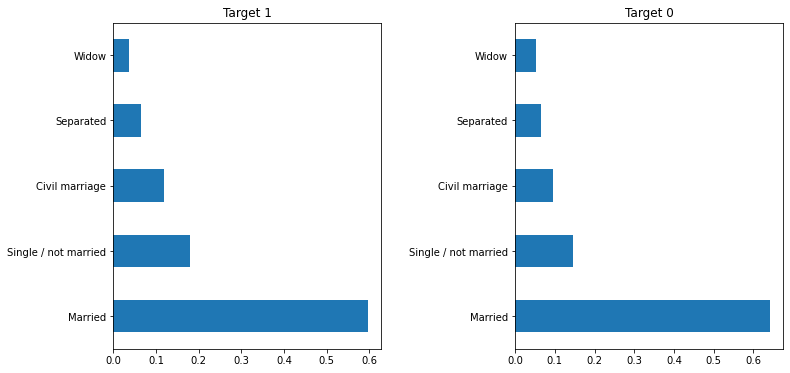

In [41]:
plt.figure(figsize=[12,6])
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
TARGET1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('Target 1')
plt.subplot(1,2,2)
TARGET0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('Target 0')
plt.show()

 - As we can see from above married people are more likely to default as compared to singles as its quite obvious due to more expenses in married life than during bachelor life.

#### OCCUPATION_TYPE

In [38]:
TARGET1.OCCUPATION_TYPE.value_counts(normalize=True)

Others                   0.252890
Laborers                 0.235166
Sales staff              0.124552
Drivers                  0.084874
Core staff               0.070010
Managers                 0.053494
Security staff           0.029084
High skill tech staff    0.028238
Cooking staff            0.025015
Medicine staff           0.023041
Accountants              0.019094
Cleaning staff           0.018006
Low-skill Laborers       0.014461
Private service staff    0.007049
Waiters/barmen staff     0.006123
Secretaries              0.003706
Realty agents            0.002377
HR staff                 0.001450
IT staff                 0.001370
Name: OCCUPATION_TYPE, dtype: float64

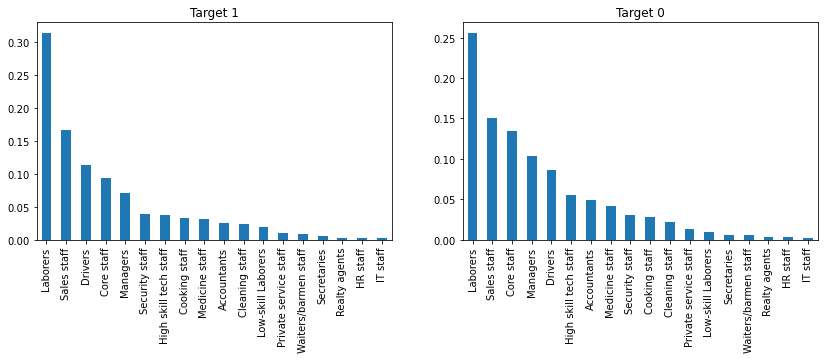

In [44]:
plt.figure(figsize=[14,4])
#plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
TARGET1[~(TARGET1.OCCUPATION_TYPE=='Others')].OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Target 1')
plt.subplot(1,2,2)
TARGET0[~(TARGET0.OCCUPATION_TYPE=='Others')].OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Target 0')
plt.show()

- As we can see Laborers are by far highest category of clients who are facing difficulty with their payment of loan usually
- Staff from IT industry are the least to get defaulted on their payments.

#### NAME_EDUCATION_TYPE

In [72]:
TARGET1.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64

In [44]:
TARGET1.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

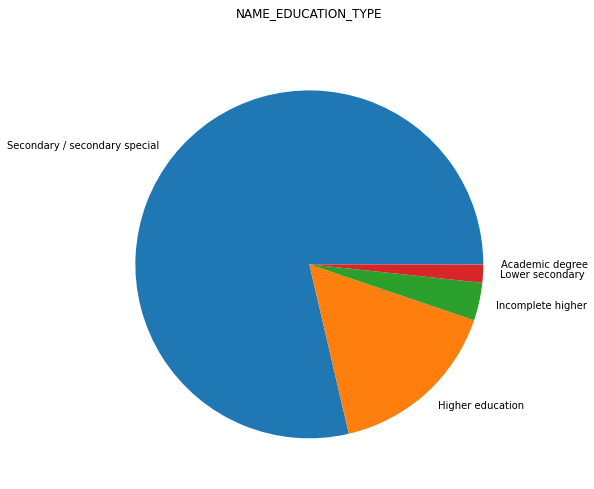

In [46]:
fig = plt.figure(figsize =(8, 8))
TARGET1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.title('NAME_EDUCATION_TYPE', pad=30)
plt.ylabel("") 
plt.show()

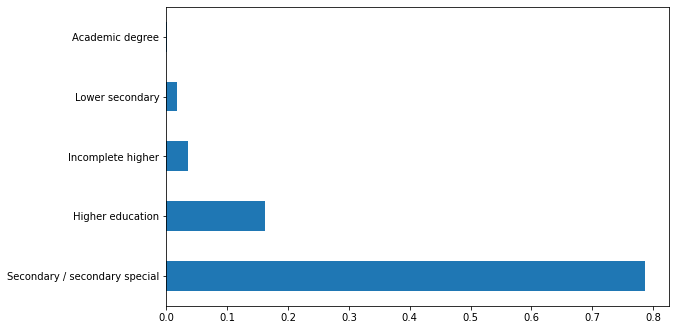

In [54]:
TARGET1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

- As we can see from above pie chart/ bar people whose education is usually only until secondary/secondary special are the most likely to default on the payments while those with any academic degrees are very very less likely to default.

#### DAYS_EMPLOYED

In [73]:
## As we have already converted DAYS_EMPLOYED to Year, hence below is the analysis for employement years with respect to people
## with more chance of getting defaulted.
TARGET1.DAYS_EMPLOYED.describe()

count    21835.000000
mean         4.971422
std          5.075279
min          0.000000
25%          2.000000
50%          3.000000
75%          7.000000
max         44.000000
Name: DAYS_EMPLOYED, dtype: float64

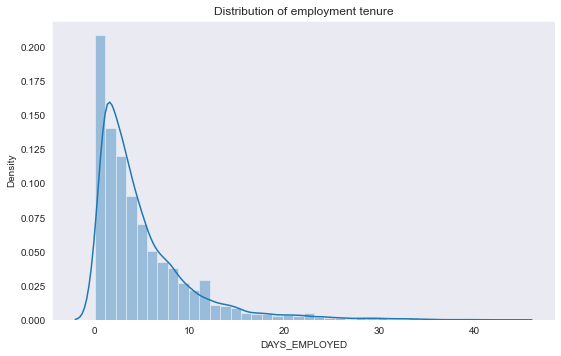

In [81]:
?sns.set_style
sns.set_style("dark")
sns.distplot(TARGET1.DAYS_EMPLOYED, bins=40)
plt.title("Distribution of employment tenure", fontsize=12)
plt.show()

-- As we can from above chart, people who have just started their employement or being employed for less than 3 years or so are more likely to default with their payments as expenses may outweigh their income and hence may face difficulty with the paying the loans.

In [68]:
TARGET0.DAYS_EMPLOYED.describe()

count    230288.000000
mean          6.680787
std           6.504819
min           0.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          49.000000
Name: DAYS_EMPLOYED, dtype: float64

#### AMT_INCOME_TOTAL

In [97]:
TARGET1.AMT_INCOME_TOTAL.describe()

count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

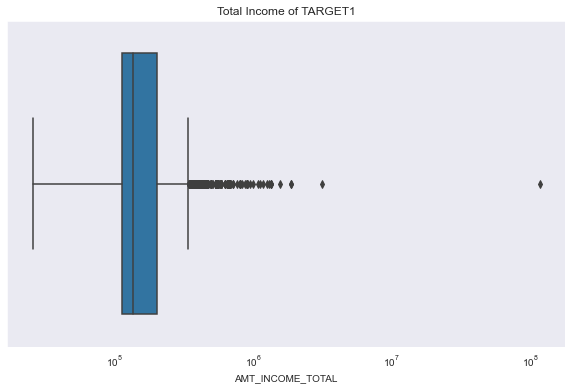

In [95]:
plt.figure(figsize = [10,6])
sns.boxplot(TARGET1['AMT_INCOME_TOTAL'])
plt.xscale('log')
plt.title('Total Income of TARGET1')
plt.show()

In [108]:
TARGET1.head(50)

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,M,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,26.0,2.0,Laborers,0.262949,0.139376,2.0,2.0,2.0,2.0,N,Y,0,351000.0,1.0,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,100031,1,F,112500.0,979992.0,27076.5,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,51.0,7.0,Cooking staff,0.548477,0.190706,10.0,1.0,10.0,0.0,N,Y,0,702000.0,1.0,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
40,100047,1,M,202500.0,1193580.0,35028.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,48.0,3.0,Laborers,0.306841,0.320163,0.0,0.0,0.0,0.0,N,Y,0,855000.0,2.0,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,100049,1,F,135000.0,288873.0,16258.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,37.0,10.0,Sales staff,0.674203,0.399676,1.0,0.0,1.0,0.0,N,N,0,238500.0,2.0,0,0,0,0,0,0,Self-employed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81,100096,1,F,81000.0,252000.0,14593.5,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,68.0,NaN,Others,0.023952,0.720944,1.0,1.0,1.0,1.0,N,Y,0,252000.0,2.0,0,0,0,0,0,0,XNA,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,100112,1,M,315000.0,953460.0,64107.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,28.0,6.0,Others,0.432340,0.077499,0.0,0.0,0.0,0.0,Y,Y,0,900000.0,1.0,0,0,0,0,1,1,Industry: type 4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110,100130,1,F,157500.0,723996.0,30802.5,Unaccompanied,Commercial associate,Incomplete higher,Separated,House / apartment,29.0,1.0,Sales staff,0.282069,0.120641,0.0,0.0,0.0,0.0,N,Y,1,585000.0,2.0,0,1,1,0,1,1,Trade: type 2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
138,100160,1,M,292500.0,675000.0,36747.0,Unaccompanied,Working,Higher education,Married,House / apartment,46.0,1.0,Managers,0.631961,0.289611,0.0,0.0,0.0,0.0,N,Y,0,675000.0,2.0,1,1,0,1,1,0,Business Entity Type 3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
154,100181,1,F,157500.0,245619.0,12667.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,48.0,21.0,Private service staff,0.182171,0.443615,0.0,0.0,0.0,0.0,N,Y,0,166500.0,1.0,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
163,100192,1,F,111915.0,225000.0,21037.5,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,With parents,22.0,0.0,Core staff,0.086253,0.513694,0.0,0.0,0.0,0.0,N,N,0,225000.0,1.0,0,0,0,0,1,1,Trade: type 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Bivariate Analysis 

#### AMT_INCOME_TOTAL and FLAG_OWN_REALTY

- As we can see from above box plot since INCOME data is continuous variable, its better to convert it in to income range categorical variable

In [48]:
pd.cut(app_data2.AMT_INCOME_TOTAL[:10],[25000,100000,202500,200000000], labels=["Low-income","Mid-income","High-income"])

0       Mid-income
26      Mid-income
40      Mid-income
42      Mid-income
81      Low-income
94     High-income
110     Mid-income
138    High-income
154     Mid-income
163     Mid-income
Name: AMT_INCOME_TOTAL, dtype: category
Categories (3, object): ['Low-income' < 'Mid-income' < 'High-income']

In [55]:
app_data2["INCOME_GROUP"] = pd.cut(app_data2.AMT_INCOME_TOTAL,[25000,100000,202500,200000000],labels=["Low-income","Mid-income","High-income"])

In [56]:
app_data2.INCOME_GROUP.value_counts(normalize=True)

Mid-income     0.560220
High-income    0.232636
Low-income     0.207143
Name: INCOME_GROUP, dtype: float64

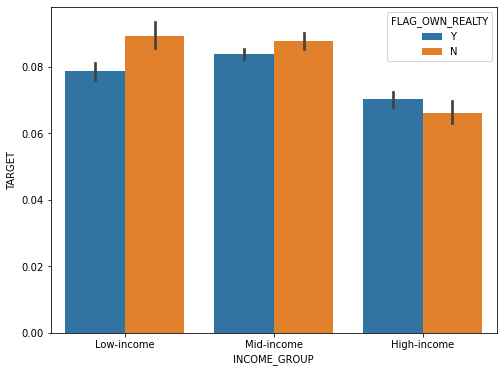

In [82]:
plt.figure(figsize=[8,6])
sns.barplot(data=app_data2, x = "INCOME_GROUP", y = 'TARGET', hue='FLAG_OWN_REALTY')
plt.show()

-- From above bar plot we can see that those from low and middle income groups who don't own a realty are more likely to default with their loan payments

### NAME_INCOME_TYPE and AMT_CREDIT under TARGET1

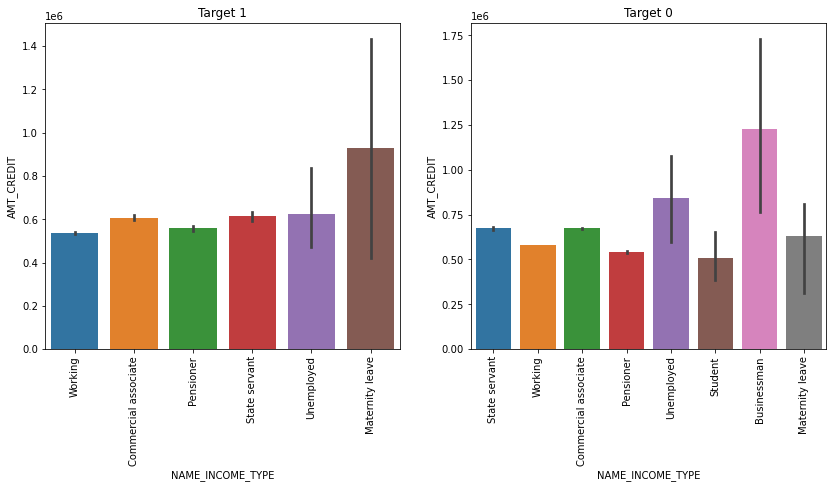

In [76]:
plt.figure(figsize = [14,6])
plt.subplot(1,2,1)
sns.barplot(data=TARGET1, x = "NAME_INCOME_TYPE", y = 'AMT_CREDIT')
plt.xticks(rotation=90)
plt.title('Target 1')
plt.subplot(1,2,2)
sns.barplot(data=TARGET0, x = "NAME_INCOME_TYPE", y = 'AMT_CREDIT')
plt.xticks(rotation=90)
plt.title('Target 0')
plt.show()

- From the above bar plot we can see that Women on Maternity Leave are much more likely to Default. 
This might be due to unpaid leaves by the organizations and in some cases, the women might not be earning, but the additional expenses cause the loans to be defaulted.

### NAME_EDUCATION_TYPE and NAME_FAMILY_STATUS

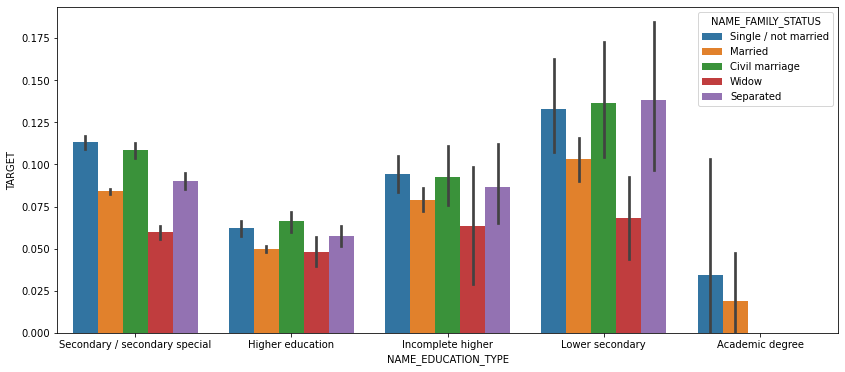

In [79]:
plt.figure(figsize = [14,6])
sns.barplot(data=app_data2, x = "NAME_EDUCATION_TYPE", y = 'TARGET', hue='NAME_FAMILY_STATUS')
plt.show()

- Applicants who have been separated from their spouses and have lower secondary education are more likely to default
- Married people with academic degree are least likely to default.

In [71]:
TARGET0.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
1,100003,0,F,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,46.0,3.0,Core staff,0.622246,NaN,1.0,0.0,1.0,0.0,N,N,0,1129500.0,2.0,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,M,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.0,1.0,Laborers,0.555912,0.729567,0.0,0.0,0.0,0.0,Y,Y,0,135000.0,1.0,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,F,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.0,8.0,Laborers,0.650442,NaN,2.0,0.0,2.0,0.0,N,Y,0,297000.0,2.0,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,M,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,55.0,8.0,Core staff,0.322738,NaN,0.0,0.0,0.0,0.0,N,Y,0,513000.0,1.0,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,100008,0,M,99000.0,490495.5,27517.5,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,46.0,4.0,Laborers,0.354225,0.621226,0.0,0.0,0.0,0.0,N,Y,0,454500.0,2.0,0,0,0,0,0,0,Other,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Analysis on "DAYS_BIRTH" vs "TARGET"

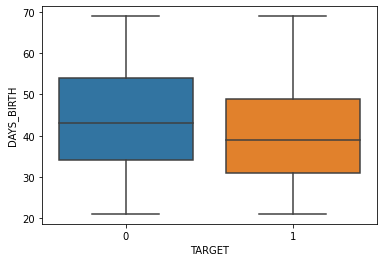

In [116]:
sns.boxplot(data=updated_app_data, x="TARGET", y="DAYS_BIRTH")
plt.show()

## Multivariate analysis

In [21]:
# Reading TARGET0 table which has data for all customers with TARGET=0
TARGET0.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
1,100003,0,F,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,46.0,3.0,Core staff,0.622246,NaN,1.0,0.0,1.0,0.0,N,N,0,1129500.0,2.0,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,M,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.0,1.0,Laborers,0.555912,0.729567,0.0,0.0,0.0,0.0,Y,Y,0,135000.0,1.0,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,F,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.0,8.0,Laborers,0.650442,NaN,2.0,0.0,2.0,0.0,N,Y,0,297000.0,2.0,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,M,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,55.0,8.0,Core staff,0.322738,NaN,0.0,0.0,0.0,0.0,N,Y,0,513000.0,1.0,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,100008,0,M,99000.0,490495.5,27517.5,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,46.0,4.0,Laborers,0.354225,0.621226,0.0,0.0,0.0,0.0,N,Y,0,454500.0,2.0,0,0,0,0,0,0,Other,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Reading TARGET1 table which has data for all customers with TARGET=0
TARGET1.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,M,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,26.0,2.0,Laborers,0.262949,0.139376,2.0,2.0,2.0,2.0,N,Y,0,351000.0,1.0,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,100031,1,F,112500.0,979992.0,27076.5,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,51.0,7.0,Cooking staff,0.548477,0.190706,10.0,1.0,10.0,0.0,N,Y,0,702000.0,1.0,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
40,100047,1,M,202500.0,1193580.0,35028.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,48.0,3.0,Laborers,0.306841,0.320163,0.0,0.0,0.0,0.0,N,Y,0,855000.0,2.0,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,100049,1,F,135000.0,288873.0,16258.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,37.0,10.0,Sales staff,0.674203,0.399676,1.0,0.0,1.0,0.0,N,N,0,238500.0,2.0,0,0,0,0,0,0,Self-employed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81,100096,1,F,81000.0,252000.0,14593.5,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,68.0,NaN,Others,0.023952,0.720944,1.0,1.0,1.0,1.0,N,Y,0,252000.0,2.0,0,0,0,0,0,0,XNA,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


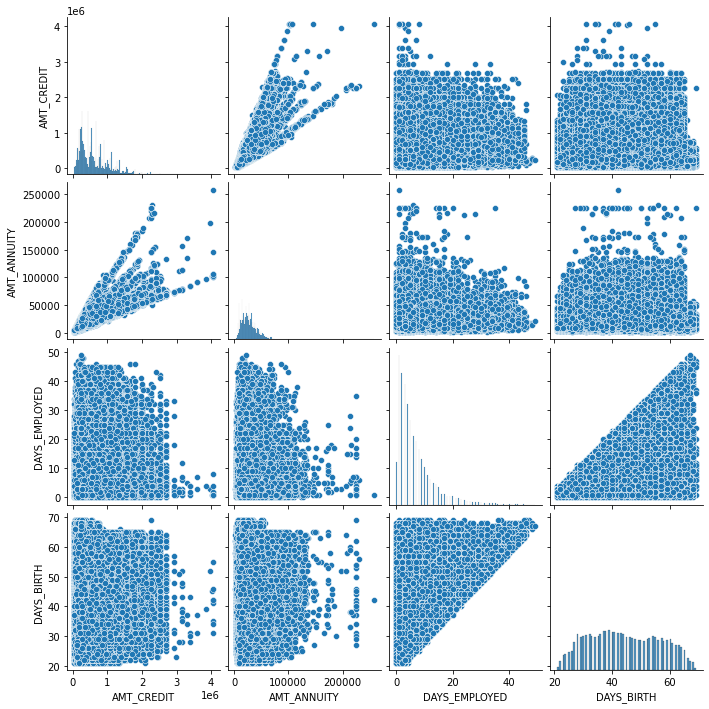

In [23]:
# Pair plotting with "AMT_CREDIT","AMT_ANNUITY","DAYS_EMPLOYED","DAYS_BIRTH" on TARGET0 data
sns.pairplot(data=TARGET0, vars=["AMT_CREDIT","AMT_ANNUITY","DAYS_EMPLOYED","DAYS_BIRTH"])
plt.show()

**Inferences:**
- AMT_CREDIT & AMT_ANNUITY are directly proportional
- The loan applications are distributed across all age groups

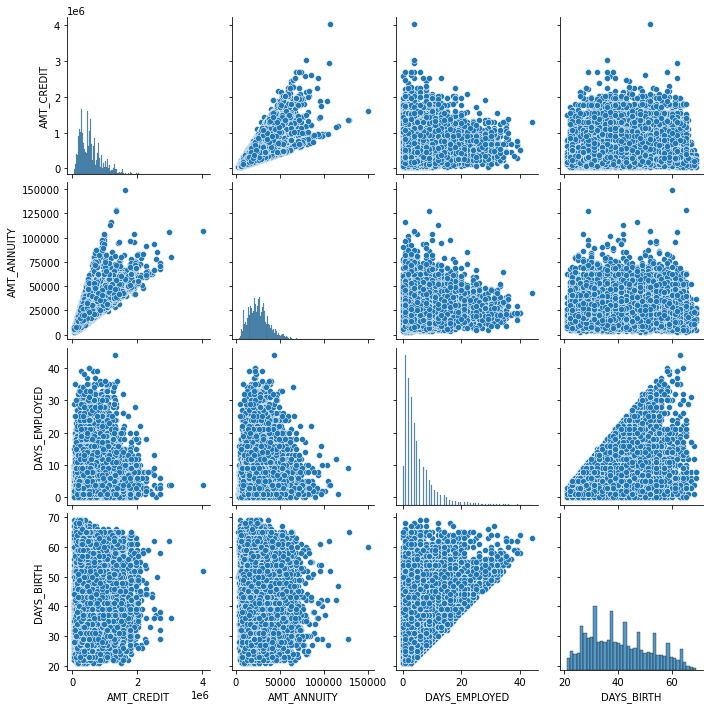

In [24]:
# Pair plotting with "AMT_CREDIT","AMT_ANNUITY","DAYS_EMPLOYED","DAYS_BIRTH" on TARGET1 data
sns.pairplot(data=TARGET1, vars=["AMT_CREDIT","AMT_ANNUITY","DAYS_EMPLOYED","DAYS_BIRTH"])
plt.show()

**Inferences:**
- AMT_CREDIT & AMT_ANNUITY are directly proportional
- The AMT_ANNUITY is inversely proporation or having negative causation with DAYS_EMPLOYED, means customers who are employed for a long time are more likely to repay on-time

### Quantify using correlation values

In [25]:
TARGET1[["AMT_INCOME_TOTAL","AMT_ANNUITY","DAYS_BIRTH"]].corr()

,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_BIRTH
AMT_INCOME_TOTAL,1.000000,0.046421,-0.002872
AMT_ANNUITY,0.046421,1.000000,0.014249
DAYS_BIRTH,-0.002872,0.014249,1.000000


#### Correlation Heatmap

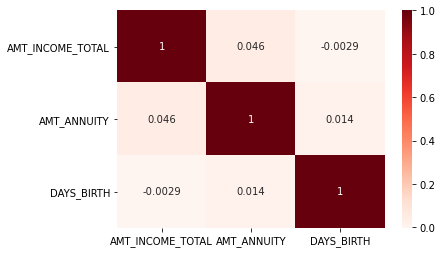

In [26]:
sns.heatmap(TARGET1[["AMT_INCOME_TOTAL","AMT_ANNUITY","DAYS_BIRTH"]].corr(), annot=True, cmap="Reds")
plt.show()


#### Identify Highly Correlated Features
- Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable)

#### Create correlation matrix for TARGET0
https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/

In [27]:
corr_matrix_TARGET0 = TARGET0.corr().abs()
corr_matrix_TARGET0

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_CHILDREN,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,NaN,0.001739,0.000364,0.000070,0.001312,0.000036,0.001603,0.000279,0.000699,0.000551,0.000744,0.002377,0.000726,0.000228,0.002805,0.000084,0.000830,0.002779,0.002868,0.001680,0.000448,0.001342,0.003217,0.004321,0.001374,0.001967,0.003171,0.001613,0.002006,0.000853,0.001901,0.001092,0.001005,0.001237,0.002330,0.000755,0.001776,0.001193,0.000676,0.000832,0.000486
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,0.001739,NaN,1.000000,0.342796,0.418954,0.062595,0.030369,0.139596,0.072405,0.027834,0.027617,0.027695,0.027589,0.027408,0.349457,0.034258,0.068520,0.137114,0.127635,0.010569,0.017590,0.020652,0.002856,0.039229,0.001160,0.004088,0.100268,0.009040,0.159344,0.040090,0.000637,0.005403,0.005680,0.049423,0.045592,0.023815,0.015802,0.005142,0.008216,0.005762,0.000840,0.000869
AMT_CREDIT,0.000364,NaN,0.342796,1.000000,0.771309,0.047425,0.087642,0.129153,0.036063,0.000916,0.019852,0.000894,0.022227,0.003079,0.987251,0.064529,0.024628,0.053720,0.054235,0.025023,0.015710,0.002500,0.005490,0.100349,0.000567,0.011741,0.050262,0.003635,0.084508,0.022297,0.003243,0.028341,0.003956,0.053726,0.047987,0.032412,0.062477,0.012188,0.035527,0.021561,0.032152,0.015602
AMT_ANNUITY,0.000070,NaN,0.418954,0.771309,1.000000,0.012200,0.052798,0.126614,0.028051,0.013092,0.022534,0.012894,0.023384,0.020907,0.776686,0.075787,0.041992,0.080661,0.075482,0.005674,0.001517,0.010579,0.001265,0.103451,0.001108,0.006135,0.074961,0.001557,0.131484,0.033962,0.003493,0.004040,0.000864,0.026064,0.037219,0.016277,0.007733,0.003527,0.008343,0.004964,0.012736,0.016527
DAYS_BIRTH,0.001312,NaN,0.062595,0.047425,0.012200,1.000000,0.352235,0.078143,0.197276,0.007704,0.003047,0.007291,0.000979,0.336869,0.044600,0.285702,0.066176,0.097807,0.071559,0.179716,0.241776,0.159983,0.000312,0.104805,0.002754,0.017047,0.407782,0.001418,0.118270,0.018987,0.000088,0.045686,0.000382,0.028293,0.032734,0.013587,0.026434,0.008601,0.046431,0.004028,0.009769,0.026437
DAYS_EMPLOYED,0.000036,NaN,0.030369,0.087642,0.052798,0.352235,1.000000,0.081175,0.120991,0.000729,0.007414,0.000783,0.009361,0.063036,0.088769,0.031469,0.056688,0.082186,0.062966,0.111962,0.125449,0.074347,0.002443,0.051192,0.002248,0.009113,0.052823,0.000894,0.033590,0.003574,0.001842,0.030224,0.001957,0.007447,0.012373,0.005398,0.007406,0.002423,0.010739,0.000017,0.003756,0.012009
EXT_SOURCE_2,0.001603,NaN,0.139596,0.129153,0.126614,0.078143,0.081175,1.000000,0.084600,0.021569,0.027423,0.021223,0.029718,0.015446,0.135708,0.000570,0.017074,0.032077,0.032010,0.035026,0.068609,0.055323,0.000004,0.023774,0.002789,0.005075,0.024754,0.001503,0.050397,0.016309,0.002448,0.005352,0.002210,0.023075,0.019935,0.007252,0.010377,0.002001,0.001075,0.003332,0.000075,0.006939
EXT_SOURCE_3,0.000279,NaN,0.072405,0.036063,0.028051,0.197276,0.120991,0.084600,1.000000,0.002077,0.032519,0.001762,0.031181,0.041746,0.038887,0.026842,0.049298,0.050227,0.031077,0.074039,0.073932,0.040677,NaN,0.023622,0.002903,0.004553,0.071638,0.000195,0.018675,0.007251,0.004504,0.011817,0.001079,0.000721,0.002415,0.000312,0.002138,0.000326,0.016880,0.003605,0.013946,0.012658
OBS_3

In [28]:
corr_matrix_TARGET0.shape

(42, 42)

In [29]:
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_matrix_TARGET0 = corr_matrix_TARGET0.where(np.triu(np.ones(corr_matrix_TARGET0.shape), k=1).astype(np.bool))

In [30]:
# Convert to 1-D series and drop Null values
unique_corr_pairs_TARGET0 = upper_corr_matrix_TARGET0.unstack().reset_index().dropna()
unique_corr_pairs_TARGET0

,level_0,level_1,0
84,AMT_INCOME_TOTAL,SK_ID_CURR,0.001739
126,AMT_CREDIT,SK_ID_CURR,0.000364
128,AMT_CREDIT,AMT_INCOME_TOTAL,0.342796
168,AMT_ANNUITY,SK_ID_CURR,0.000070
170,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418954
...,...,...,...
1758,FLAG_DOCUMENT_21,FLAG_DOCUMENT_16,0.000170
1759,FLAG_DOCUMENT_21,FLAG_DOCUMENT_17,0.000299
1760,FLAG_DOCUMENT_21,FLAG_DOCUMENT_18,0.000565
1761,FLAG_DOCUMENT_21,FLAG_DOCUMENT_19,0.000437


In [31]:
# Rename Correlation column name
unique_corr_pairs_TARGET0.rename(columns={ unique_corr_pairs_TARGET0.columns[2]: "Correlation_TARGET0" }, inplace = True)

In [32]:
# Sort_values based on column index
correlation_TARGET0 = unique_corr_pairs_TARGET0.sort_values(by=["Correlation_TARGET0"], ascending=False).head(10)
correlation_TARGET0

,level_0,level_1,Correlation_TARGET0
471,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
591,AMT_GOODS_PRICE,AMT_CREDIT,0.987251
643,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878575
773,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861812
514,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859331
902,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830366
592,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
171,AMT_ANNUITY,AMT_CREDIT,0.771309
1115,FLAG_DOCUMENT_6,FLAG_DOCUMENT_3,0.486443
1199,FLAG_DOCUMENT_8,FLAG_DOCUMENT_3,0.461069


**Inferences:**
- MT_GOODS_PRICE & AMT_CREDIT show good correlation of upto 0.987251. Thus, for consumer requesting for high loan credit have high goods price
- Customers with high CNT_FAM_MEMBERS are likely to have more CNT_CHILDREN, thus showing that they might falls under defaulters because of family commitments

#### Create correlation matrix for TARGET1

In [33]:
corr_matrix_TARGET1 = TARGET1.corr().abs()
corr_matrix_TARGET1

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_CHILDREN,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,NaN,0.010165,0.001290,0.007578,0.001299,0.000726,0.006452,0.008178,0.009395,0.005549,0.009058,0.009428,0.005144,0.001816,0.003816,0.004249,0.004120,0.004303,0.008328,0.000787,0.002929,0.002291,0.004640,NaN,0.002669,0.003320,0.002342,0.003887,0.005247,NaN,0.003634,NaN,0.001685,0.001327,0.007977,0.000704,0.005428,0.009181,0.006382,0.003781,0.006932
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,0.010165,NaN,1.000000,0.038131,0.046421,0.002872,0.000732,0.007154,0.015110,0.004709,0.005186,0.004616,0.004866,0.004796,0.037583,0.006654,0.007577,0.014531,0.013409,0.002223,0.003019,0.001353,0.000168,0.001446,NaN,0.001094,0.011774,0.000561,0.016119,0.004616,NaN,0.000172,NaN,0.006271,0.003969,0.001871,0.001717,0.000368,0.002177,0.000371,0.000450,0.000647
AMT_CREDIT,0.001290,NaN,0.038131,1.000000,0.752195,0.135318,0.106075,0.120848,0.077698,0.019098,0.025979,0.019487,0.030880,0.001675,0.983103,0.051224,0.019540,0.033260,0.033554,0.033034,0.037720,0.016509,0.034225,0.061629,NaN,0.012192,0.005333,0.012227,0.056351,0.025318,NaN,0.037012,NaN,0.018148,0.063136,0.026399,0.046752,0.000694,0.011174,0.013442,0.016949,0.021964
AMT_ANNUITY,0.007578,NaN,0.046421,0.752195,1.000000,0.014249,0.049279,0.116305,0.041415,0.004463,0.022394,0.005500,0.027495,0.031257,0.752699,0.075711,0.034807,0.066565,0.064109,0.005745,0.001997,0.009902,0.018068,0.104865,NaN,0.013983,0.063666,0.015767,0.117437,0.028638,NaN,0.001161,NaN,0.001187,0.028128,0.011742,0.004823,0.006037,0.034168,0.001563,0.001466,0.029489
DAYS_BIRTH,0.001299,NaN,0.002872,0.135318,0.014249,1.000000,0.306303,0.108829,0.171801,0.005080,0.004699,0.005307,0.003667,0.258910,0.135744,0.203014,0.054585,0.069520,0.045502,0.161885,0.215084,0.123442,0.012391,0.128865,NaN,0.014069,0.387171,0.001701,0.063884,0.012254,NaN,0.039357,NaN,0.010123,0.012342,0.013082,0.004379,0.000173,0.028093,0.000374,0.000019,0.033786
DAYS_EMPLOYED,0.000726,NaN,0.000732,0.106075,0.049279,0.306303,1.000000,0.094374,0.085171,0.030551,0.000506,0.030467,0.000440,0.032456,0.112186,0.001895,0.059146,0.075279,0.054128,0.113077,0.133166,0.069642,0.010745,0.042587,NaN,0.020361,0.038111,0.006093,0.025079,0.005954,NaN,0.035607,NaN,0.006856,0.010998,0.012340,0.005431,0.021741,0.007403,0.006799,0.006426,0.013048
EXT_SOURCE_2,0.006452,NaN,0.007154,0.120848,0.116305,0.108829,0.094374,1.000000,0.077760,0.017505,0.010052,0.017872,0.011056,0.012260,0.131184,0.001883,0.012874,0.021285,0.020363,0.050077,0.070128,0.046107,0.010048,0.025873,NaN,0.004611,0.011103,0.005320,0.047107,0.015558,NaN,0.002421,NaN,0.012637,0.020517,0.012668,0.024310,0.004110,0.004948,0.000337,0.006354,0.005229
EXT_SOURCE_3,0.008178,NaN,0.015110,0.077698,0.041415,0.171801,0.085171,0.077760,1.000000,0.005614,0.022253,0.005925,0.014596,0.020268,0.078754,0.019884,0.044686,0.031222,0.012516,0.053158,0.053324,0.025262,NaN,0.019076,NaN,0.017088,0.067425,0.004325,0.007296,0.006669,NaN,0.011081,NaN,0.021691,0.011271,0.013040,0.022727,NaN,0.029552,0.006267,0.013580,0.011932
OBS_30_CNT_SOCIAL_CIRCLE,0.009395,NaN,0.004709,0.019098,0.004463,0.005080,0.030551,0.017505,0.005614,1.000000,0.333825,0.998269,0.

In [34]:
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_matrix_TARGET1 = corr_matrix_TARGET1.where(np.triu(np.ones(corr_matrix_TARGET1.shape), k=1).astype(np.bool))

In [35]:
# Convert to 1-D series and drop Null values
unique_corr_pairs_TARGET1 = upper_corr_matrix_TARGET1.unstack().reset_index().dropna()
unique_corr_pairs_TARGET1

,level_0,level_1,0
84,AMT_INCOME_TOTAL,SK_ID_CURR,0.010165
126,AMT_CREDIT,SK_ID_CURR,0.001290
128,AMT_CREDIT,AMT_INCOME_TOTAL,0.038131
168,AMT_ANNUITY,SK_ID_CURR,0.007578
170,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421
...,...,...,...
1758,FLAG_DOCUMENT_21,FLAG_DOCUMENT_16,0.041936
1759,FLAG_DOCUMENT_21,FLAG_DOCUMENT_17,0.000213
1760,FLAG_DOCUMENT_21,FLAG_DOCUMENT_18,0.065695
1761,FLAG_DOCUMENT_21,FLAG_DOCUMENT_19,0.000522


In [36]:
# Rename Correlation column name
unique_corr_pairs_TARGET1.rename(columns={ unique_corr_pairs_TARGET1.columns[2]: "Correlation_TARGET1" }, inplace = True)

In [37]:
# Sort_values based on column index
correlation_TARGET1 = unique_corr_pairs_TARGET1.sort_values(by=["Correlation_TARGET1"], ascending=False).head(10)
correlation_TARGET1

,level_0,level_1,Correlation_TARGET1
471,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
591,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
643,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
514,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
773,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
902,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
592,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
171,AMT_ANNUITY,AMT_CREDIT,0.752195
1199,FLAG_DOCUMENT_8,FLAG_DOCUMENT_3,0.528927
730,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.497937


**Inferences:**
- MT_GOODS_PRICE & AMT_CREDIT show good correlation of upto 0.983103. Thus, for consumer requesting for high loan credit have high goods price
- Customers with high CNT_FAM_MEMBERS are likely to have more CNT_CHILDREN, thus showing that they might falls under defaulters because of family commitments

###  Performing analysis on pre_app data 

In [50]:
pre_app.shape

(1670214, 37)

In [49]:
pre_app.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

### Handling missing values
#### Dropping columns having null values greater than 800000

In [53]:
pre_app = pre_app.loc[:, pre_app.isnull().sum()<=800000]
pre_app.shape

(1670214, 32)

In [59]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
pre_app.shape

(1670214, 32)

In [57]:
pre_app.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
DAYS_FIRST_D

In [61]:
# AMT_CREDIT has 1 null value and we will have it removed.
pre_app1 = pre_app[~pre_app.AMT_CREDIT.isnull()].copy()
pre_app1.shape

(1670213, 32)

In [62]:
pre_app1.NAME_CONTRACT_STATUS.value_counts()

Approved        1036780
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [64]:
pre_app1.NAME_YIELD_GROUP.value_counts(normalize=True)

XNA           0.309669
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: NAME_YIELD_GROUP, dtype: float64

In [65]:
pre_app1.NFLAG_INSURED_ON_APPROVAL.value_counts(normalize=True)

0.0    0.66743
1.0    0.33257
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [66]:
pre_app1.NFLAG_INSURED_ON_APPROVAL.isnull().sum()

673064

-- As we are doing very limited analysis with only few colulmns needed for it, we will not deal with few other columns left with high null values as they are not being used in the analysis

## Univariate analysis for previous application

#### Loan Status for previous application.

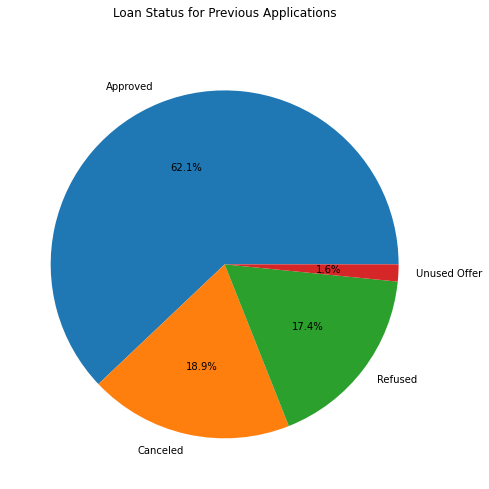

In [68]:
fig = plt.figure(figsize =(8, 8))
plt.pie(pre_app1['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100,autopct='%1.1f%%',labels=['Approved', 'Canceled','Refused','Unused Offer'])
plt.title('Loan Status for Previous Applications', pad=30)
plt.ylabel("") 
plt.show()

**Inferences:**
 - We can see that most of the applications have been approved 
 - Next we can see they are either cancelled or refused.

#### Loan Types for previous application

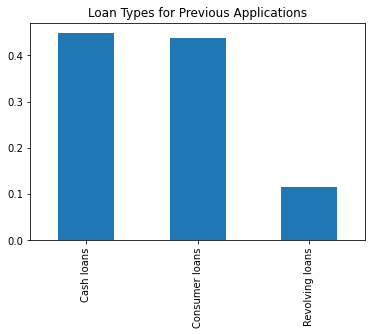

In [73]:
pre_app1[~(pre_app1.NAME_CONTRACT_TYPE=='XNA')].NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Loan Types for Previous Applications')
plt.show()

 - As we can see cash and consumer loans are mostly applied by applicants and Revolving loans are pretty less favourable.

#### Univariate analysis for NAME_CASH_LOAN_PURPOSE 

In [83]:
pre_app1.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

In [84]:
#Remove the rows with values which are part of NA viz. XNA and XAP 
pre_app2 = pre_app1[~pre_app1['NAME_CASH_LOAN_PURPOSE'].isin(['XNA','XAP'])]

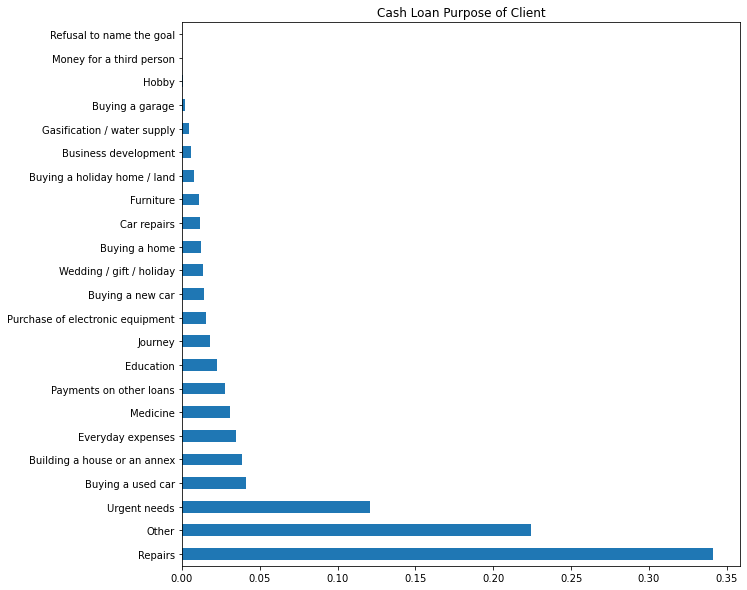

In [86]:
plt.figure(figsize = [10,10])
pre_app2.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.barh()
#pre_app1[~(pre_app1.NAME_CASH_LOAN_PURPOSE in ('XNA','XAP'))].NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.barh()
plt.title('Cash Loan Purpose of Client')
plt.show()

- As we can see from above bar chart most of the cash loans are taken for Repairs 

### Bivariate Analysis for Total Credit Amount v/s Loan Type distributed over Approval Status

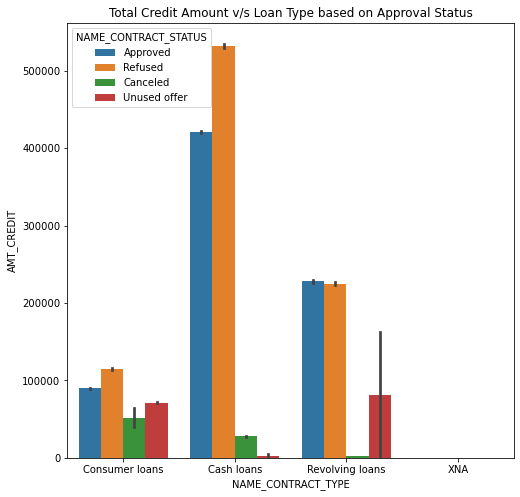

In [89]:
plt.figure(figsize = [8,8])
ax = sns.barplot( data = pre_app1, x = 'NAME_CONTRACT_TYPE', y = 'AMT_CREDIT', hue = 'NAME_CONTRACT_STATUS')
plt.title('Total Credit Amount v/s Loan Type based on Approval Status')
plt.show()

### Merging two dataframes: app_data & pre_app

In [38]:
# Picking important variables from the Application Date set
app_data_toMerge = app_data2[['SK_ID_CURR','TARGET','CODE_GENDER','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                             'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                             'DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE']]
app_data_toMerge.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE
0,100002,1,M,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,26.0,2.0,Laborers
1,100003,0,F,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,46.0,3.0,Core staff
2,100004,0,M,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,52.0,1.0,Laborers
3,100006,0,F,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,52.0,8.0,Laborers
4,100007,0,M,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,55.0,8.0,Core staff


In [39]:
# Picking important variables from the Previous Application dataset
pre_app_toMerge = pre_app[['SK_ID_CURR','SK_ID_PREV','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','CODE_REJECT_REASON']]
pre_app_toMerge.head()

,SK_ID_CURR,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,CODE_REJECT_REASON
0,271877,2030495,1730.430,17145.0,17145.0,XAP
1,108129,2802425,25188.615,607500.0,679671.0,XAP
2,122040,2523466,15060.735,112500.0,136444.5,XAP
3,176158,2819243,47041.335,450000.0,470790.0,XAP
4,202054,1784265,31924.395,337500.0,404055.0,HC


In [40]:
df_merged = pd.merge(app_data_toMerge,pre_app_toMerge, on = 'SK_ID_CURR', how = 'inner')
df_merged.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,CODE_REJECT_REASON
0,100002,1,M,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,26.0,2.0,Laborers,1038818,9251.775,179055.0,179055.0,XAP
1,100003,0,F,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,46.0,3.0,Core staff,1810518,98356.995,900000.0,1035882.0,XAP
2,100003,0,F,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,46.0,3.0,Core staff,2636178,64567.665,337500.0,348637.5,XAP
3,100003,0,F,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,46.0,3.0,Core staff,2396755,6737.310,68809.5,68053.5,XAP
4,100004,0,M,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,52.0,1.0,Laborers,1564014,5357.250,24282.0,20106.0,XAP


In [41]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413608 entries, 0 to 1413607
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   SK_ID_CURR           1413608 non-null  int64  
 1   TARGET               1413608 non-null  int64  
 2   CODE_GENDER          1413608 non-null  object 
 3   AMT_INCOME_TOTAL     1413608 non-null  float64
 4   AMT_CREDIT_x         1413608 non-null  float64
 5   AMT_ANNUITY_x        1413608 non-null  float64
 6   NAME_TYPE_SUITE      1410082 non-null  object 
 7   NAME_INCOME_TYPE     1413608 non-null  object 
 8   NAME_EDUCATION_TYPE  1413608 non-null  object 
 9   NAME_FAMILY_STATUS   1413608 non-null  object 
 10  DAYS_BIRTH           1413608 non-null  float64
 11  DAYS_EMPLOYED        1140025 non-null  float64
 12  OCCUPATION_TYPE      1413608 non-null  object 
 13  SK_ID_PREV           1413608 non-null  int64  
 14  AMT_ANNUITY_y        1106420 non-null  float64
 15

In [42]:
# Renaming columns names for correct inference
df_merged.rename(columns = {'AMT_CREDIT_x':'AMT_CREDIT_CURR','AMT_CREDIT_y':'AMT_CREDIT_PREV',
                           'AMT_ANNUITY_x':'AMT_ANNUITY_CURR', 'AMT_ANNUITY_y': 'AMT_ANNUITY_PREV'}, inplace = True)

In [43]:
df_merged.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_CURR,AMT_ANNUITY_CURR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,SK_ID_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,CODE_REJECT_REASON
0,100002,1,M,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,26.0,2.0,Laborers,1038818,9251.775,179055.0,179055.0,XAP
1,100003,0,F,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,46.0,3.0,Core staff,1810518,98356.995,900000.0,1035882.0,XAP
2,100003,0,F,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,46.0,3.0,Core staff,2636178,64567.665,337500.0,348637.5,XAP
3,100003,0,F,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,46.0,3.0,Core staff,2396755,6737.310,68809.5,68053.5,XAP
4,100004,0,M,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,52.0,1.0,Laborers,1564014,5357.250,24282.0,20106.0,XAP


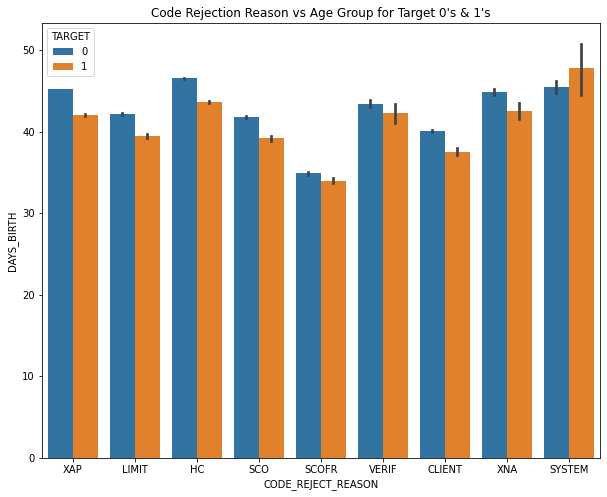

In [44]:
plt.figure(figsize = [10,8])
ax = sns.barplot(x = 'CODE_REJECT_REASON', y = 'DAYS_BIRTH', hue = 'TARGET', data = df_merged)
plt.title("Code Rejection Reason vs Age Group for Target 0's & 1's")
plt.show()

**Inferences:**
- With this we can infer that "SYSTEM" CODE_REJECT_REASON has the highest count across applicants across age band upto close to 50 years 

In [45]:
# Creating pivot table on this new merged dataframe
pvt_app_prev1 = pd.pivot_table(data=df_merged, index="OCCUPATION_TYPE", columns="CODE_REJECT_REASON", values="TARGET")
pvt_app_prev1

CODE_REJECT_REASON,CLIENT,HC,LIMIT,SCO,SCOFR,SYSTEM,VERIF,XAP,XNA
OCCUPATION_TYPE,,,,,,,,,
Accountants,0.058589,0.086891,0.090975,0.070078,0.206731,0.000000,0.082759,0.051200,0.075758
Cleaning staff,0.097179,0.118833,0.124253,0.092213,0.246835,0.000000,0.055556,0.086300,0.075269
Cooking staff,0.092391,0.146292,0.174668,0.140028,0.224080,0.083333,0.114286,0.099991,0.073684
Core staff,0.072053,0.093916,0.102516,0.079144,0.162839,0.060606,0.048611,0.062488,0.081744
Drivers,0.101816,0.160691,0.167769,0.138228,0.243902,0.060000,0.134387,0.110922,0.149826
HR staff,0.142857,0.087786,0.070423,0.243902,0.384615,0.000000,0.000000,0.064551,0.142857
High skill tech staff,0.071504,0.093028,0.102664,0.060109,0.151235,0.050000,0.080357,0.065380,0.089655
IT staff,0.322581,0.039370,0.118644,0.078431,0.153846,0.000000,0.000000,0.062942,0.000000
Laborers,0.096221,0.155317,0.155446,0.128530,0.234716,0.052632,0.110039,0.103267,0.121554


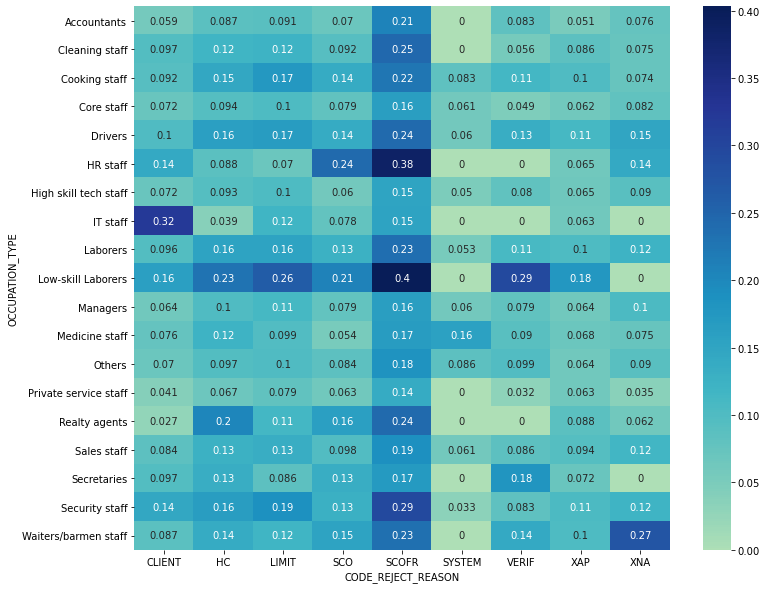

In [46]:
plt.figure(figsize = [12,10])
sns.heatmap(pvt_app_prev1, annot=True, cmap="YlGnBu", center=0.117)
plt.show()

**Inferences:**
- In this we can infer that "SCOFR" CODE_REJECT_REASON is common rejection reason across all OCCUPATION_TYPE customers
- Low-skill Laborers have the maximum rejections across all rejections types and we can infer that as they have daily and inconsistent wages, they are more likely to get their loan applications rejected

In [47]:
pvt_app_prev2 = pd.pivot_table(data=df_merged, index="NAME_INCOME_TYPE", columns="CODE_REJECT_REASON", values="TARGET")
pvt_app_prev2

CODE_REJECT_REASON,CLIENT,HC,LIMIT,SCO,SCOFR,SYSTEM,VERIF,XAP,XNA
NAME_INCOME_TYPE,,,,,,,,,
Commercial associate,0.066838,0.106886,0.115203,0.097403,0.191171,0.055556,0.085884,0.074723,0.100848
Maternity leave,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Pensioner,0.053015,0.080550,0.075497,0.068260,0.116162,0.090909,0.066202,0.054526,0.060927
State servant,0.070487,0.086275,0.094456,0.065647,0.154028,0.086957,0.052632,0.059505,0.081851
Student,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
Unemployed,0.000000,0.750000,0.714286,0.444444,1.000000,NaN,0.000000,0.500000,0.000000
Working,0.093307,0.142349,0.146461,0.111885,0.221872,0.054830,0.107075,0.093939,0.116718


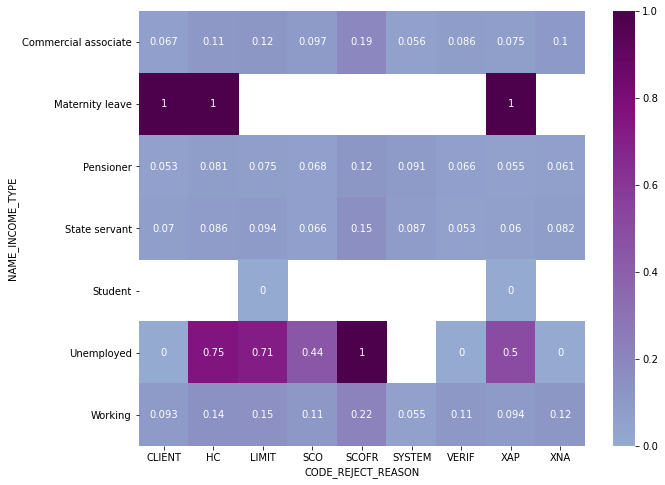

In [48]:
plt.figure(figsize = [10,8])
sns.heatmap(pvt_app_prev2, annot=True, cmap="BuPu", center=0.117)
plt.show()

**Inferences:**
- In this we can infer that Unemployed customers are more likely to default as they dont have an income to repay the loan on time and are risky 
- Also, women on Maternity Leave are more likely to become defaulters as they might be on unpaid leave